
## Personality System

Five Personality Traits (OCEAN)

- Openness to experience (inventive/curious vs. consistent/cautious)
- Conscientiousness (efficient/organized vs. easy-going/careless)
- Extroversion (outgoing/energetic vs. solitary/reserved)
- Agreeableness (friendly/compassionate vs. challenging/detached)
- Neuroticism (sensitive/nervous vs. secure/confident)

Resources: 
- [wikipedia](https://en.wikipedia.org/wiki/Big_Five_personality_traits)
- [ipip.ori.org](https://ipip.ori.org/newBigFive5broadKey.htm)
- [How Accurately Can You Describe Yourself?](https://ipip.ori.org/new_ipip-50-item-scale.htm)
- [Dataset](https://www.kaggle.com/datasets/tunguz/big-five-personality-test)


# Personality System

#### read Codebook

In [1]:
# lib's
import numpy as np
import pandas as pd
import glob
import random

# for ploting
import matplotlib.pyplot as plt
import seaborn as sns

# clustering lib and Visualize the elbow
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# For ease of calculation, scale all the values between 0-1 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_csv(r'dataset\\data-final.csv', delimiter='\t')
# df

In [3]:
# dataframe_list = [pd.read_csv(df_path) for df_path in glob.glob(r'dataset\data_final\*.csv')]
# print(dataframe_list)

In [2]:
df = pd.concat([pd.read_csv(df_path) for df_path in glob.glob(r'dataset\data_final\*.csv')])
df.reset_index(drop=True, inplace=True)
df

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

                    dateload  screenw  screenh  introelapse  testelapse  \
0        2016-03-03 02:01:01    768.0   1024.0          9.0       234.0   
1        2016-03-03 02:01:20   1360.0    768.0         12.0       179.0   
2        2016-03-03 02:01:56   1366.0    768.0          3.0       186.0   
3        2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0   
4        2016-03-03 02:02:57   1366.0    768.0          8.0       315.0   
...                      ...      ...      ...          ...         ...   
1015336  2018-11-08 12:04:58   1920.0   1080.0          3.0       160.0   
1015337  2018-11-08 12:07:18   1920.0   1080.0          3.0       122.0   
1015338  2018-11-08 12:07:49   1920.0   1080.0          2.0       135.0   
1015339  2018-11-08 12:08:34   1920.0   1080.0          6.0       212.0   
1015340  2018-11-08 12:08:45   1920.0   1080.0          3.0       176.0   

         endelapse  IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0                6    1       GB               51.5448                 0.1991  
1               11    1       MY                3.1698                101.706  
2                7    1       GB               54.9119                -1.3833  
3                7    1       GB                 51.75                  -1.25  
4               17    2       KE                   1.0                   38.0  
...            ...  ...      ...                   ...                    ...  
1015336         10    2       US               39.9883               -75.2208  
1015337          7    1       US                  38.0                  -97.0  
1015338         12    6       US               36.1473                -86.777  
1015339          8    1       US               34.1067              -117.8067  
1015340          9    1       US                  38.0                  -97.0  

[1015341 rows x 110 columns]

In [3]:
columns = df.columns
print(columns)

for c in columns:
    print(c)

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)
EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_o

In [4]:
X = df[df.columns[0:50]]
X

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

         OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0         5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0  
1         1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0  
2         5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0  
3         4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0  
4         5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  
1015336   2.0   2.0   4.0   3.0   4.0   2.0   4.0   2.0   2.0    4.0  
1015337   4.0   1.0   5.0   1.0   5.0   1.0   3.0   4.0   5.0    4.0  
1015338   5.0   1.0   5.0   1.0   4.0   1.0   5.0   5.0   4.0    5.0  
1015339   5.0   2.0   4.0   2.0   3.0   2.0   4.0   5.0   5.0    3.0  
1015340   5.0   1.0   5.0   1.0   3.0   1.0   5.0   4.0   5.0    5.0  

[1015341 rows x 50 columns]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1013558 non-null  float64
 1   EXT2    1013558 non-null  float64
 2   EXT3    1013558 non-null  float64
 3   EXT4    1013558 non-null  float64
 4   EXT5    1013558 non-null  float64
 5   EXT6    1013558 non-null  float64
 6   EXT7    1013558 non-null  float64
 7   EXT8    1013558 non-null  float64
 8   EXT9    1013558 non-null  float64
 9   EXT10   1013558 non-null  float64
 10  EST1    1013558 non-null  float64
 11  EST2    1013558 non-null  float64
 12  EST3    1013558 non-null  float64
 13  EST4    1013558 non-null  float64
 14  EST5    1013558 non-null  float64
 15  EST6    1013558 non-null  float64
 16  EST7    1013558 non-null  float64
 17  EST8    1013558 non-null  float64
 18  EST9    1013558 non-null  float64
 19  EST10   1013558 non-null  float64
 20  AGR1    1013558 non-null

In [7]:
round(X.describe(),2)

EXT1        EXT2        EXT3        EXT4        EXT5        EXT6  \
count  1013558.00  1013558.00  1013558.00  1013558.00  1013558.00  1013558.00   
mean         2.65        2.77        3.29        3.14        3.28        2.40   
std          1.26        1.32        1.22        1.24        1.28        1.23   
min          0.00        0.00        0.00        0.00        0.00        0.00   
25%          1.00        2.00        2.00        2.00        2.00        1.00   
50%          3.00        3.00        3.00        3.00        3.00        2.00   
75%          4.00        4.00        4.00        4.00        4.00        3.00   
max          5.00        5.00        5.00        5.00        5.00        5.00   

             EXT7        EXT8        EXT9       EXT10  ...        OPN1  \
count  1013558.00  1013558.00  1013558.00  1013558.00  ...  1013558.00   
mean         2.77        3.41        2.96        3.56  ...        3.65   
std          1.40        1.27        1.35        1.31  ...        1.16   
min          0.00        0.00        0.00        0.00  ...        0.00   
25%          2.00        2.00        2.00        3.00  ...        3.00   
50%          3.00        4.00        3.00        4.00  ...        4.00   
75%          4.00        4.00        4.00        5.00  ...        5.00   
max          5.00        5.00        5.00        5.00  ...        5.00   

             OPN2       OPN3        OPN4        OPN5        OPN6        OPN7  \
count  1013558.00  1013558.0  1013558.00  1013558.00  1013558.00  1013558.00   
mean         2.08        4.0        2.00        3.79        1.89        3.98   
std          1.11        1.1        1.09        0.99        1.10        1.01   
min          0.00        0.0        0.00        0.00        0.00        0.00   
25%          1.00        3.0        1.00        3.00        1.00        3.00   
50%          2.00        4.0        2.00        4.00        2.00        4.00   
75%          3.00        5.0        3.00        5.00        2.00        5.00   
max          5.00        5.0        5.00        5.00        5.00        5.00   

             OPN8        OPN9       OPN10  
count  1013558.00  1013558.00  1013558.00  
mean         3.18        4.12        3.96  
std          1.26        1.04        1.03  
min          0.00        0.00        0.00  
25%          2.00        4.00        3.00  
50%          3.00        4.00        4.00  
75%          4.00        5.00        5.00  
max          5.00        5.00        5.00  

[8 rows x 50 columns]

In [9]:
# plot missing values

# def plot_nas(df: pd.DataFrame):
#     if df.isnull().sum().sum() != 0:
#         na_df = (df.isnull().sum() / len(df)) * 100      
#         na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
#         missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
#         missing_data.plot(kind = "barh")
#         plt.show()
#     else:
#         print('No NAs found')
# plot_nas(df)

# https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj

In [8]:
# No nan value : for safety purposes fill nan with 0
X = X.fillna(0)

In [17]:
# Split the date
from sklearn.model_selection import train_test_split
train, test = train_test_split(X, test_size=0.005, random_state=41)
print(train.shape)
print(test.shape)


(1010264, 50)
(5077, 50)


In [18]:
#train.to_csv("PersonalitySystem_train.csv", index=False)
test.to_csv("PersonalitySystem_test.csv", index=False)

In [11]:
# to find number of clusters
columns = list(X.columns)
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(X)
data = pd.DataFrame(data, columns=columns)
df_sample = data[:10000]
df_sample

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1  \
0      0.8   0.2   1.0   0.4   1.0   0.2   1.0   0.4   0.8    0.2  ...   1.0   
1      0.6   1.0   0.6   0.8   0.6   0.6   0.4   1.0   0.2    1.0  ...   0.2   
2      0.4   0.6   0.8   0.8   0.6   0.4   0.2   0.6   0.4    1.0  ...   1.0   
3      0.4   0.4   0.4   0.6   0.8   0.4   0.4   0.8   0.2    0.8  ...   0.8   
4      0.6   0.6   0.6   0.6   1.0   0.6   0.6   1.0   0.6    0.8  ...   1.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   ...   
9995   0.4   0.6   0.4   0.6   0.4   0.8   0.4   0.8   0.2    1.0  ...   0.4   
9996   0.4   0.6   0.6   0.8   0.8   0.4   0.4   0.8   0.2    1.0  ...   0.4   
9997   0.8   0.8   0.6   0.6   0.6   0.6   0.2   0.8   0.6    0.6  ...   0.4   
9998   0.4   0.4   0.4   0.6   0.6   0.6   0.2   0.8   0.6    0.8  ...   0.8   
9999   0.2   0.2   0.6   0.8   0.4   0.8   0.2   0.8   0.2    0.8  ...   1.0   

      OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0      0.2   0.8   0.2   0.8   0.2   1.0   0.6   0.8    1.0  
1      0.4   0.8   0.4   0.6   0.2   0.8   0.4   1.0    0.6  
2      0.2   0.4   0.2   0.8   0.4   1.0   0.6   0.8    0.8  
3      0.4   1.0   0.4   0.6   0.2   0.8   0.8   0.6    0.6  
4      0.2   1.0   0.2   1.0   0.2   1.0   0.6   1.0    1.0  
...    ...   ...   ...   ...   ...   ...   ...   ...    ...  
9995   0.6   0.6   0.4   0.8   0.8   0.8   0.2   0.6    0.6  
9996   0.6   0.8   0.4   0.4   0.6   0.8   0.2   0.8    0.8  
9997   0.4   0.4   0.4   0.8   0.4   0.8   0.6   0.6    0.8  
9998   0.2   0.8   0.4   0.4   0.4   0.6   0.6   0.8    0.8  
9999   0.2   1.0   0.4   0.8   0.2   1.0   0.8   0.8    0.8  

[10000 rows x 50 columns]

In [12]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(df_sample) 
    wcss.append(kmeans.inertia_)
    print(f"{i} : {kmeans.inertia_}")

1 : 29077.825359999915
2 : 26173.324126693715
3 : 24902.97495787551
4 : 24026.972634749025
5 : 23394.18999702124
6 : 23006.582337025815
7 : 22445.636228589945
8 : 22303.273501219624
9 : 21759.02061336551
10 : 21485.2241227621


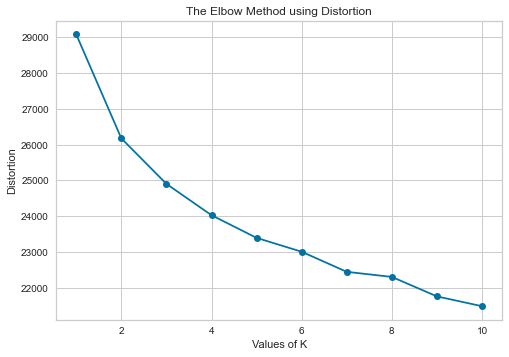

In [13]:
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

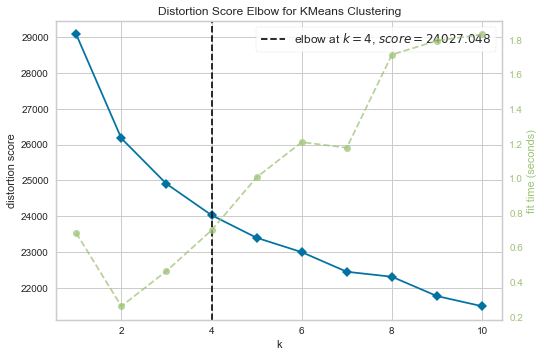

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_sample) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [16]:
# MiniBatchKMeans clustering -- in unsupervised learning algorithms

kmeans = MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=1000, max_iter=100).fit(data)

# n_clusters : number of personality type (in our case its 10 -- you can change it with any number of cluster)
# random_state : change as you want
# batch_size : the amount of data that is going to train at once or one at a time (feed the data in batches)
# max_iter : train the data at n times (in our case its 100 times)

In [17]:
# to check the number of cluster after model train

len(kmeans.cluster_centers_)

5

In [19]:
# to find personality types -- most common answer of each type or common answer pattern

one = kmeans.cluster_centers_[0]
two = kmeans.cluster_centers_[1]
three =kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five =kmeans.cluster_centers_[4]


In [20]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] - personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] + personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait

In [21]:
all_types_scores

{'one': {'extroversion_score': 1.8123634918677456,
  'neuroticism_score': 4.587019909291459,
  'agreeableness_score': -0.41287321357613593,
  'conscientiousness_score': 2.8549499184719314,
  'openness_score': 3.91547800112358},
 'two': {'extroversion_score': -1.598783962915631,
  'neuroticism_score': 3.029551606169086,
  'agreeableness_score': 0.2938205948421615,
  'conscientiousness_score': 0.14148893104625349,
  'openness_score': 1.8150004365668386},
 'three': {'extroversion_score': 0.9647526296578934,
  'neuroticism_score': 4.02562464744334,
  'agreeableness_score': -0.25054749975113777,
  'conscientiousness_score': 2.089522845671432,
  'openness_score': 3.2839250754886002},
 'four': {'extroversion_score': -1.0920365924186368,
  'neuroticism_score': 3.2092024324845347,
  'agreeableness_score': 0.3284712851159286,
  'conscientiousness_score': 0.5180193126653954,
  'openness_score': 1.9742398485830968},
 'five': {'extroversion_score': -0.8448307838973884,
  'neuroticism_score': 3.3187

In [22]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])
    

In [23]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [24]:
all_extroversion_normalized, len(all_extroversion_normalized)

(array([1.        , 0.        , 0.75151738, 0.14855628, 0.22102626]), 5)

In [25]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [26]:
normalized_all_types_scores

{'one': {'extroversion_score': 1.0,
  'neuroticism_score': 1.0,
  'agreeableness_score': 0.0,
  'conscientiousness_score': 1.0,
  'openness_score': 1.0},
 'two': {'extroversion_score': 0.0,
  'neuroticism_score': 0.0,
  'agreeableness_score': 0.9532596649264944,
  'conscientiousness_score': 0.0,
  'openness_score': 0.0},
 'three': {'extroversion_score': 0.7515173784055373,
  'neuroticism_score': 0.6395462683107916,
  'agreeableness_score': 0.2189612442142423,
  'conscientiousness_score': 0.7179148414709006,
  'openness_score': 0.6993288877292746},
 'four': {'extroversion_score': 0.148556278265366,
  'neuroticism_score': 0.11534798233472182,
  'agreeableness_score': 1.0,
  'conscientiousness_score': 0.13876388249693056,
  'openness_score': 0.07581105111677879},
 'five': {'extroversion_score': 0.22102626433254616,
  'neuroticism_score': 0.18566284625666105,
  'agreeableness_score': 0.9923888360199827,
  'conscientiousness_score': 0.25083785308958934,
  'openness_score': 0.240723333517348

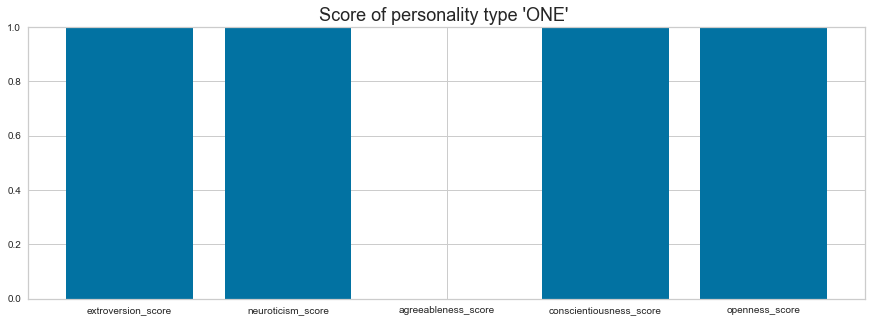

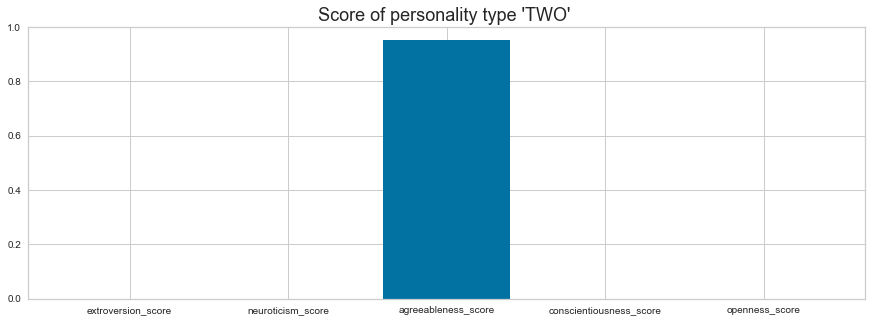

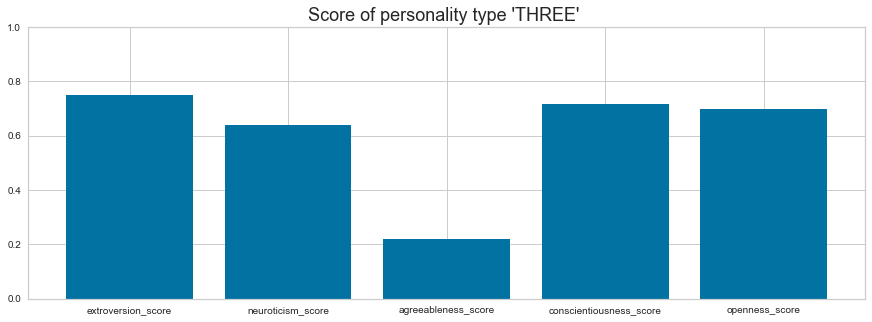

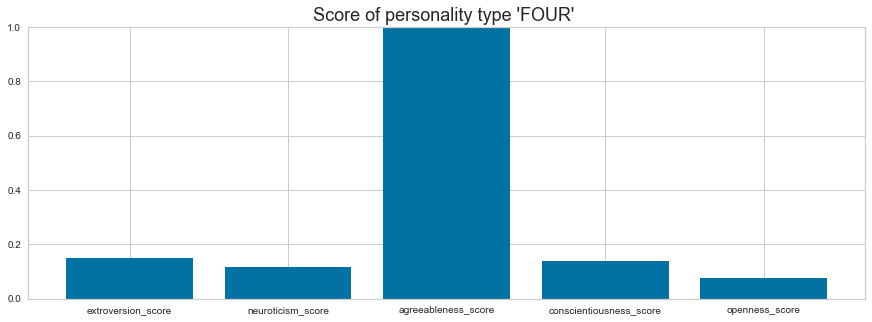

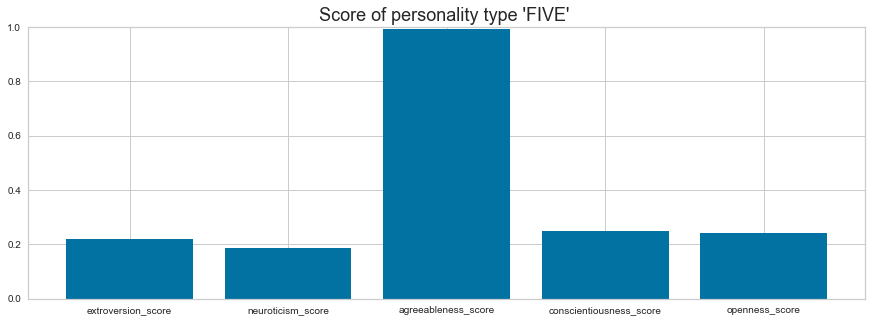

In [27]:
for k in all_types.keys():

    plt.figure(figsize=(15,5))
    plt.ylim(0, 1)
    plt.bar(list(normalized_all_types_scores[k].keys()), normalized_all_types_scores[k].values(), color='b')
    plt.title(f"Score of personality type '{k.upper()}' ", size=18)
    plt.show()

In [28]:
X

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

         OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0         5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0  
1         1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0  
2         5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0  
3         4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0  
4         5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  
1015336   2.0   2.0   4.0   3.0   4.0   2.0   4.0   2.0   2.0    4.0  
1015337   4.0   1.0   5.0   1.0   5.0   1.0   3.0   4.0   5.0    4.0  
1015338   5.0   1.0   5.0   1.0   4.0   1.0   5.0   5.0   4.0    5.0  
1015339   5.0   2.0   4.0   2.0   3.0   2.0   4.0   5.0   5.0    3.0  
1015340   5.0   1.0   5.0   1.0   3.0   1.0   5.0   4.0   5.0    5.0  

[1015341 rows x 50 columns]

In [29]:
data

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         0.8   0.2   1.0   0.4   1.0   0.2   1.0   0.4   0.8    0.2  ...   
1         0.6   1.0   0.6   0.8   0.6   0.6   0.4   1.0   0.2    1.0  ...   
2         0.4   0.6   0.8   0.8   0.6   0.4   0.2   0.6   0.4    1.0  ...   
3         0.4   0.4   0.4   0.6   0.8   0.4   0.4   0.8   0.2    0.8  ...   
4         0.6   0.6   0.6   0.6   1.0   0.6   0.6   1.0   0.6    0.8  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   0.8   0.4   0.8   0.6   0.8   0.6   0.6   0.6   0.6    0.6  ...   
1015337   0.8   0.6   0.8   0.6   0.6   0.6   0.8   0.8   0.6    0.6  ...   
1015338   0.8   0.4   0.8   0.6   1.0   0.2   0.8   0.4   0.8    0.8  ...   
1015339   0.4   0.8   0.6   0.8   0.4   0.4   0.2   0.8   0.4    0.8  ...   
1015340   0.8   0.4   0.8   0.4   0.8   0.2   0.8   0.4   0.8    0.8  ...   

         OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0         1.0   0.2   0.8   0.2   0.8   0.2   1.0   0.6   0.8    1.0  
1         0.2   0.4   0.8   0.4   0.6   0.2   0.8   0.4   1.0    0.6  
2         1.0   0.2   0.4   0.2   0.8   0.4   1.0   0.6   0.8    0.8  
3         0.8   0.4   1.0   0.4   0.6   0.2   0.8   0.8   0.6    0.6  
4         1.0   0.2   1.0   0.2   1.0   0.2   1.0   0.6   1.0    1.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  
1015336   0.4   0.4   0.8   0.6   0.8   0.4   0.8   0.4   0.4    0.8  
1015337   0.8   0.2   1.0   0.2   1.0   0.2   0.6   0.8   1.0    0.8  
1015338   1.0   0.2   1.0   0.2   0.8   0.2   1.0   1.0   0.8    1.0  
1015339   1.0   0.4   0.8   0.4   0.6   0.4   0.8   1.0   1.0    0.6  
1015340   1.0   0.2   1.0   0.2   0.6   0.2   1.0   0.8   1.0    1.0  

[1015341 rows x 50 columns]

In [30]:
Y = kmeans.predict(data)

In [31]:
Y, len(Y)

(array([0, 1, 1, ..., 0, 1, 0]), 1015341)

In [32]:
df_with_labels = pd.DataFrame(X, columns=X.columns)
df_with_labels['personality_type'] = Y
df_with_labels

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

         OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  \
0         1.0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0   
1         2.0   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0   
2         1.0   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0   
3         2.0   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0   
4         1.0   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0   
...       ...   ...   ...   ...   ...   ...   ...   ...    ...   
1015336   2.0   4.0   3.0   4.0   2.0   4.0   2.0   2.0    4.0   
1015337   1.0   5.0   1.0   5.0   1.0   3.0   4.0   5.0    4.0   
1015338   1.0   5.0   1.0   4.0   1.0   5.0   5.0   4.0    5.0   
1015339   2.0   4.0   2.0   3.0   2.0   4.0   5.0   5.0    3.0   
1015340   1.0   5.0   1.0   3.0   1.0   5.0   4.0   5.0    5.0   

         personality_type  
0                       0  
1                       1  
2                       1  
3                       4  
4                       2  
...                   ...  
1015336                 0  
1015337                 4  
1015338                 0  
1015339                 1  
1015340                 0  

[1015341 rows x 51 columns]

In [33]:
# Visualizing the Cluster Predictions

# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = Y
df_pca.head()

PCA1      PCA2  Clusters
0 -5.681433 -1.298543         0
1 -0.021695  2.801386         1
2 -0.822631  2.073872         1
3  1.680267  0.570555         4
4 -4.549435  1.899375         2

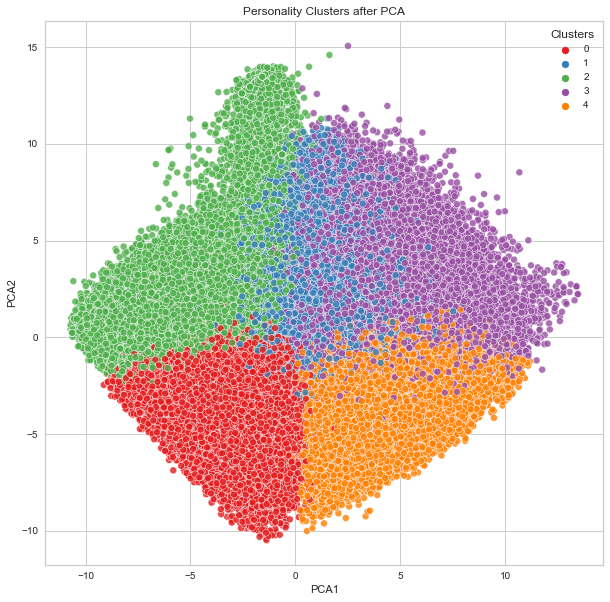

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set1', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [35]:
# Visualizing the Cluster Predictions

# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(X)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Clusters'] = Y
df_pca.head()

PCA1      PCA2      PCA3  Clusters
0 -5.681433 -1.298544  2.519109         0
1 -0.021695  2.801384 -3.270610         1
2 -0.822631  2.073874 -1.567841         1
3  1.680267  0.570555  2.250803         4
4 -4.549435  1.899374 -4.600574         2

In [36]:
df_pca_1 = df_pca[:5000]

In [37]:
import plotly.express as px
fig = px.scatter_3d(df_pca_1, x='PCA1', y='PCA2', z='PCA3', color='Clusters')
fig.show()

In [38]:
# Implementing the Model to See My Personality
columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
           'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
           'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
           'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
           'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

val1 = [random.randint(0,5) for ind in range(10)]
val2 = [random.randint(0,5) for ind in range(10)]
val3 = [random.randint(0,5) for ind in range(10)]
val4 = [random.randint(0,5) for ind in range(10)]
val5 = [random.randint(0,5) for ind in range(10)]
val = val1+val2+val3+val4+val5
len(val)

50

In [39]:
my_data = pd.DataFrame(data=[val], columns=columns)
my_data

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1  \
0     2     0     2     0     5     3     2     3     3      2  ...     0   

   OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0     2     3     3     4     1     5     4     3      4  

[1 rows x 50 columns]

In [40]:
my_data1 = scaler.transform(my_data)
my_data1

array([[0.4, 0. , 0.4, 0. , 1. , 0.6, 0.4, 0.6, 0.6, 0.4, 1. , 0.2, 0.6,
        0. , 0.6, 1. , 1. , 0.8, 0.6, 1. , 0.8, 0.8, 0.2, 0.8, 1. , 0.2,
        0.4, 0.8, 0. , 0.6, 0.8, 0.8, 1. , 1. , 0.6, 0.6, 0.6, 0. , 0.4,
        0. , 0. , 0.4, 0.6, 0.6, 0.8, 0.2, 1. , 0.8, 0.6, 0.8]])

In [41]:
my_personality = kmeans.predict(my_data1)
print('My Personality Type Cluster is : ', my_personality)

My Personality Type Cluster is :  [3]


In [42]:
# Summing up the my question groups
col_list = list(my_data)

ext = list(my_data1[0][0:10])
est = list(my_data1[0][10:20])
agr = list(my_data1[0][20:30])
csn = list(my_data1[0][30:40])
opn = list(my_data1[0][40:50])

extroversion = round(ext[0] - ext[1] + ext[2] - ext[3] + ext[4] - ext[5] + ext[6] - ext[7] + ext[8] - ext[9], 2)
neurotic = round(est[0] - est[1] + est[2] - est[3] + est[4] + est[5] + est[6] + est[7] + est[8] + est[9], 2)
agreeable = round(-agr[0] + agr[1] - agr[2] + agr[3] - agr[4] - agr[5] + agr[6] - agr[7] + agr[8] + agr[9], 2)
conscientious = round(csn[0] - csn[1] + csn[2] - csn[3] + csn[4] - csn[5] + csn[6] - csn[7] + csn[8] + csn[9], 2)
open_ = round(opn[0] - opn[1] + opn[2] - opn[3] + opn[4] - opn[5] + opn[6] + opn[7] + opn[8] + opn[9], 2)

li = [extroversion, neurotic, agreeable, conscientious, open_]
scaled_data = (li - min(li)) / (max(li) - min(li))

my_sums = pd.DataFrame([scaled_data], 
                       columns=['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open'])

my_sums['cluster'] = my_personality

print('Sum of my question groups')
my_sums

Sum of my question groups


extroversion  neurotic  agreeable  conscientious      open  cluster
0      0.235294       1.0        0.0       0.205882  0.558824        3

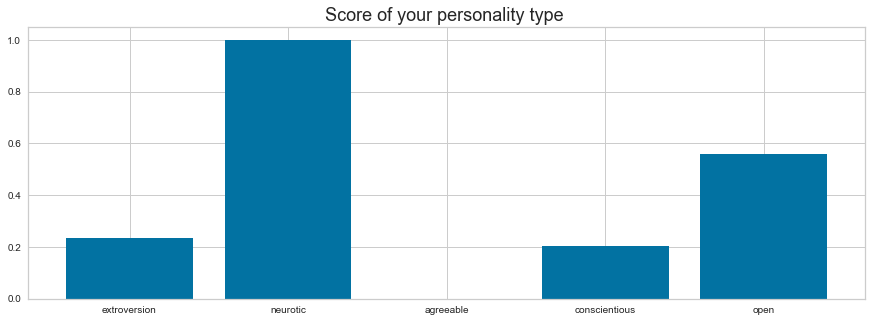

In [43]:
plt.figure(figsize=(15,5))
# plt.ylim(0, 1)
x_ax = my_sums.columns[:-1]
y_ax = my_sums.values[0][:-1]
plt.bar(x_ax, y_ax, color='b')
plt.title(f"Score of your personality type ", size=18)
plt.show()

In [44]:
import pickle

# save the MinMaxScaler to disk
filename = 'MinMaxScaler_for_personality_type.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [45]:
# save the Module to disk
filename = 'personality_type_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

In [46]:
loaded_scaler = pickle.load(open('MinMaxScaler_for_personality_type.pkl', 'rb')) 
loaded_model = pickle.load(open('personality_type_model.pkl', 'rb')) 

# Implementing the Model to See My Personality
columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
           'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
           'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
           'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
           'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

val1 = [random.randint(0,2) for ind in range(10)]
val2 = [random.randint(0,2) for ind in range(10)]
val3 = [random.randint(0,2) for ind in range(10)]
val4 = [random.randint(0,2) for ind in range(10)]
val5 = [random.randint(0,2) for ind in range(10)]
val = val1+val2+val3+val4+val5
print('length of val : ',len(val), val)

my_data = pd.DataFrame(data=[val], columns=columns)
my_data1 = loaded_scaler.transform(my_data)

my_personality = loaded_model.predict(my_data1)
print('My Personality Type Cluster is : ', my_personality)

# Summing up the my question groups
col_list = list(my_data)

ext = list(my_data1[0][0:10])
est = list(my_data1[0][10:20])
agr = list(my_data1[0][20:30])
csn = list(my_data1[0][30:40])
opn = list(my_data1[0][40:50])

extroversion = ext[0] - ext[1] + ext[2] - ext[3] + ext[4] - ext[5] + ext[6] - ext[7] + ext[8] - ext[9]
neurotic = est[0] - est[1] + est[2] - est[3] + est[4] + est[5] + est[6] + est[7] + est[8] + est[9]
agreeable = -agr[0] + agr[1] - agr[2] + agr[3] - agr[4] - agr[5] + agr[6] - agr[7] + agr[8] + agr[9]
conscientious = csn[0] - csn[1] + csn[2] - csn[3] + csn[4] - csn[5] + csn[6] - csn[7] + csn[8] + csn[9]
open_ = opn[0] - opn[1] + opn[2] - opn[3] + opn[4] - opn[5] + opn[6] + opn[7] + opn[8] + opn[9]

li = [extroversion, neurotic, agreeable, conscientious, open_]
scaled_data = (li - min(li)) / (max(li) - min(li))

my_sums = pd.DataFrame([scaled_data], 
                       columns=['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open'])

my_sums['cluster'] = my_personality

print('Sum of my question groups')
my_sums

length of val :  50 [2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2]
My Personality Type Cluster is :  [2]
Sum of my question groups


extroversion  neurotic  agreeable  conscientious      open  cluster
0      0.333333       1.0        0.0       0.333333  0.777778        2

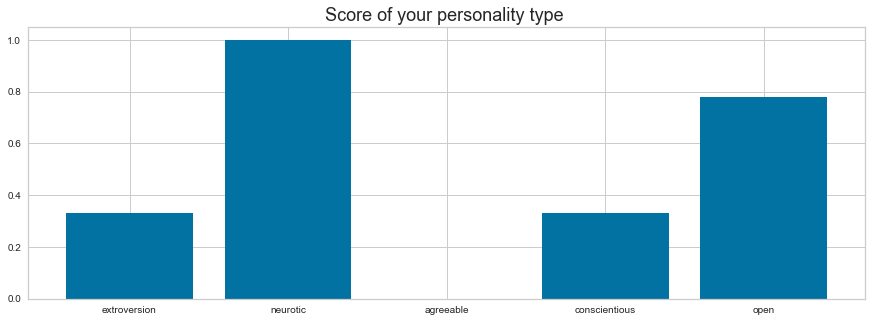

In [47]:
plt.figure(figsize=(15,5))
# plt.ylim(0, 1)
x_ax = my_sums.columns[:-1]
y_ax = my_sums.values[0][:-1]
plt.bar(x_ax, y_ax, color='b')
plt.title(f"Score of your personality type ", size=18)
plt.show()

# Resume Classification

In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

from sklearn.ensemble import RandomForestClassifier 

import warnings
warnings.filterwarnings('ignore')

In [49]:
resumeDataSet = pd.read_csv('dataset/UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

  cleaned_resume  
0                 
1                 
2                 
3                 
4

In [50]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [51]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Operations Manager           40
Data Science                 40
Blockchain                   40
Mechanical Engineer          40
Sales                        40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

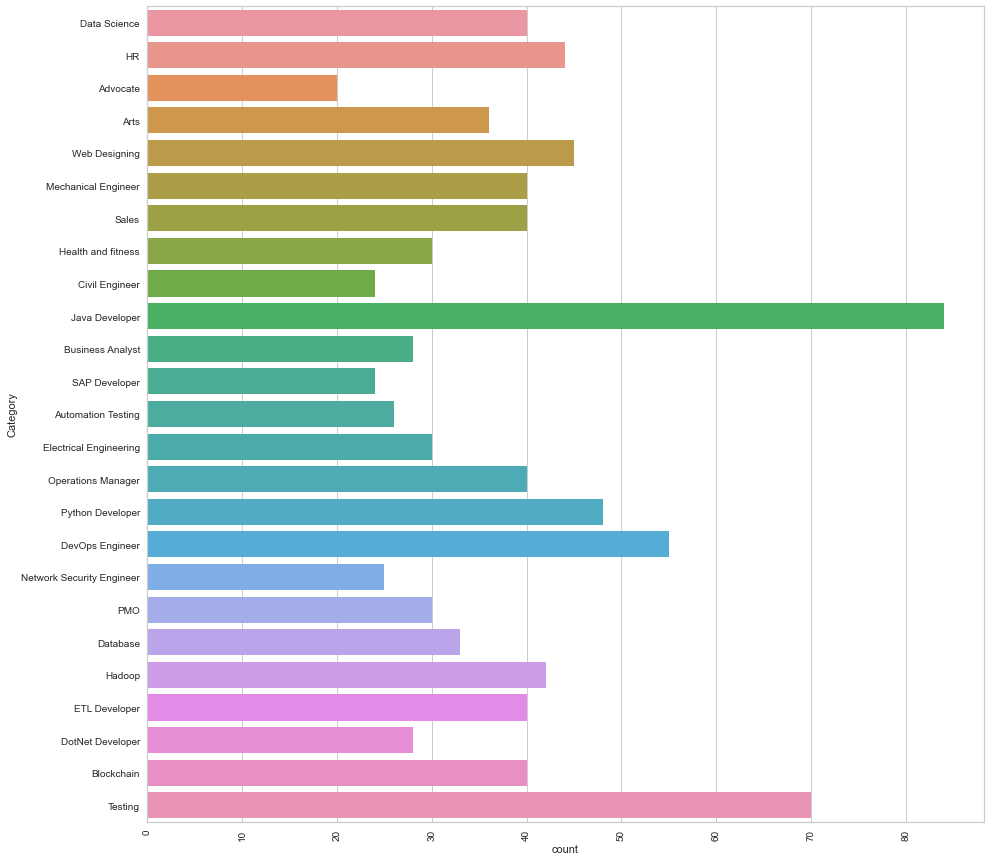

In [52]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

In [53]:
# to eliminate regular expression

import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [54]:
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print (resumeDataSet['cleaned_resume'][0])

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the r

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\munge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\munge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentences : 
 Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Se

wc :  <wordcloud.wordcloud.WordCloud object at 0x000002D2078B7438> 



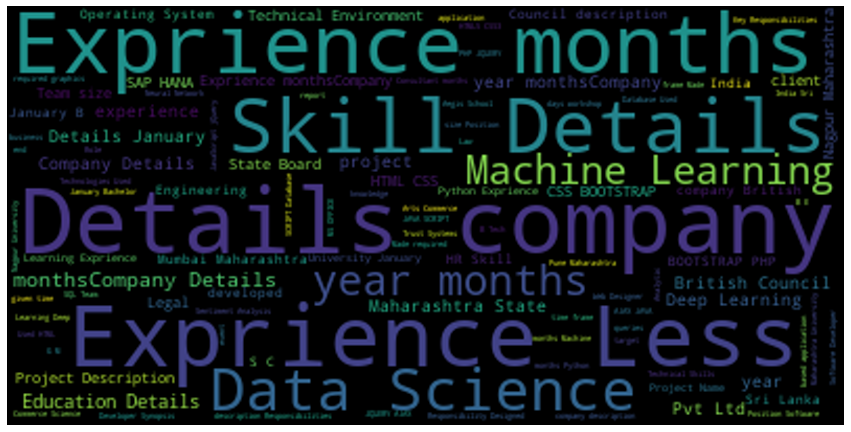

In [55]:
# !pip install nltk
# !pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
print('Sentences : \n',Sentences[0],'\n')
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print('mostcommon : ', mostcommon,'\n')
print('cleanedSentences : ', cleanedSentences,'\n')

wc = WordCloud().generate(cleanedSentences)
print('wc : ', wc,'\n')

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='spline16') # bilinear
# 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 
# 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 
# 'mitchell', 'sinc', 'lanczos', 'blackman'
plt.axis("off")
plt.show()

In [56]:
# Transform target variable using label encoding

from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")
print('resumeDataSet : ')
resumeDataSet

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS
resumeDataSet : 


Category                                             Resume  \
0           6  Skills * Programming Languages: Python (pandas...   
1           6  Education Details \r\nMay 2013 to May 2017 B.E...   
2           6  Areas of Interest Deep Learning, Control Syste...   
3           6  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4           6  Education Details \r\n MCA   YMCAUST,  Faridab...   
..        ...                                                ...   
957        23  Computer Skills: â¢ Proficient in MS office (...   
958        23  â Willingness to accept the challenges. â ...   
959        23  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   
960        23  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
961        23  Skill Set OS Windows XP/7/8/8.1/10 Database MY...   

                                        cleaned_resume  
0    Skills Programming Languages Python pandas num...  
1    Education Details May 2013 to May 2017 B E UIT...  
2    Areas of Interest Deep Learning Control System...  
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4    Education Details MCA YMCAUST Faridabad Haryan...  
..                                                 ...  
957  Computer Skills Proficient in MS office Word B...  
958   Willingness to a ept the challenges Positive ...  
959  PERSONAL SKILLS Quick learner Eagerness to lea...  
960  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...  
961  Skill Set OS Windows XP 7 8 8 1 10 Database MY...  

[962 rows x 3 columns]

In [57]:
resumeDataSet.to_csv('resumeDataSet.csv', index=False)

In [58]:
# Text representation using TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
print('requiredText : ',requiredText,'\n')
print('requiredTarget : ',requiredTarget,'\n')

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
print('WordFeatures : ',WordFeatures,'\n')

print ("Feature completed .....")


requiredText :  ['Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in

WordFeatures :    (0, 1497)	0.030442872257393377
  (0, 1484)	0.034531750632907525
  (0, 1482)	0.1138465211736939
  (0, 1460)	0.07093131129419672
  (0, 1451)	0.033309013428457386
  (0, 1442)	0.03203670321153616
  (0, 1440)	0.08546898208818157
  (0, 1439)	0.04080461724681855
  (0, 1436)	0.05680440806960008
  (0, 1420)	0.04659756799177676
  (0, 1419)	0.0503923714674369
  (0, 1389)	0.08368776039571268
  (0, 1388)	0.11957568503304351
  (0, 1382)	0.0636917041233275
  (0, 1376)	0.1487996917738002
  (0, 1371)	0.06899078914578757
  (0, 1365)	0.0531162184530022
  (0, 1364)	0.0815286030249583
  (0, 1362)	0.05813765391929385
  (0, 1358)	0.025538351209887553
  (0, 1344)	0.1499576218829958
  (0, 1343)	0.05681550781284476
  (0, 1309)	0.0646209141904646
  (0, 1299)	0.05319383005661842
  (0, 1286)	0.0346379947929267
  :	:
  (961, 336)	0.13437601229264157
  (961, 317)	0.06693311287776045
  (961, 315)	0.08639977563211801
  (961, 272)	0.025466251941105137
  (961, 258)	0.082314549875185
  (961, 243)	0.1085

In [59]:
# Split the date

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2,stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)


(769, 1500)
(193, 1500)


In [62]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators= 10, criterion="entropy"))
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print('Accuracy of RandomForest Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RandomForest Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Accuracy of RandomForest Classifier on training set: 1.00
Accuracy of RandomForest Classifier on test set: 1.00

 Classification report for classifier OneVsRestClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10)):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6


In [63]:
# Using our CVs to test the model

Test_CVs = pd.read_csv('dataset/resume_dataset.csv' ,encoding='utf-8')
Test_CVs

Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
164       Testing  Computer Skills: â¢ Proficient in MS office (...
165       Testing  â Willingness to accept the challenges. â ...
166       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
167       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
168       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[169 rows x 2 columns]

In [64]:
Test_CVs['cleaned_resume'] = ''
Test_CVs['cleaned_resume']= Test_CVs.Resume.apply(lambda x: cleanResume(x))
Test_CVs

Category                                             Resume  \
0    Data Science  Skills * Programming Languages: Python (pandas...   
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2    Data Science  Areas of Interest Deep Learning, Control Syste...   
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
..            ...                                                ...   
164       Testing  Computer Skills: â¢ Proficient in MS office (...   
165       Testing  â Willingness to accept the challenges. â ...   
166       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   
167       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
168       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...   

                                        cleaned_resume  
0    Skills Programming Languages Python pandas num...  
1    Education Details May 2013 to May 2017 B E UIT...  
2    Areas of Interest Deep Learning Control System...  
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4    Education Details MCA YMCAUST Faridabad Haryan...  
..                                                 ...  
164  Computer Skills Proficient in MS office Word B...  
165   Willingness to a ept the challenges Positive ...  
166  PERSONAL SKILLS Quick learner Eagerness to lea...  
167  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...  
168  Skill Set OS Windows XP 7 8 8 1 10 Database MY...  

[169 rows x 3 columns]

In [65]:
print(Test_CVs['cleaned_resume'][0],'\n', len(Test_CVs['cleaned_resume'][0]))

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance AssociateData Science Assurance Associate Ernst Young LLPSkill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the rev

In [66]:
test_text = Test_CVs['cleaned_resume'].values

# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     stop_words='english',
#     max_features=1500)
# word_vectorizer.fit(test_text)

WordFeatures = word_vectorizer.transform(test_text)
print('WordFeatures : ', WordFeatures)

WordFeatures :    (0, 1497)	0.030455114227144413
  (0, 1484)	0.034545636860301716
  (0, 1482)	0.11389230219122358
  (0, 1460)	0.0709598348500532
  (0, 1451)	0.03332240795744205
  (0, 1442)	0.03204958610735239
  (0, 1440)	0.08550335166686421
  (0, 1439)	0.04082102597743421
  (0, 1436)	0.056827250784289886
  (0, 1420)	0.046616306237399714
  (0, 1419)	0.050412635714580586
  (0, 1389)	0.08372141369303084
  (0, 1388)	0.11962376991500726
  (0, 1382)	0.06371731642129588
  (0, 1376)	0.14885952848402442
  (0, 1371)	0.0690185323609048
  (0, 1365)	0.05313757803872372
  (0, 1364)	0.08156138806191662
  (0, 1362)	0.05816103277115312
  (0, 1358)	0.025548620928209777
  (0, 1344)	0.15001792423080015
  (0, 1343)	0.05683835499106612
  (0, 1309)	0.06464690015099143
  (0, 1299)	0.05321522085223682
  (0, 1286)	0.034651923744206545
  :	:
  (168, 336)	0.13660835491456264
  (168, 317)	0.06804504973423957
  (168, 315)	0.08783510548286516
  (168, 272)	0.02588931405359664
  (168, 258)	0.0836820132710361
  (168, 2

In [67]:
WordFeatures.shape

(169, 1500)

In [68]:
X_test2=WordFeatures

In [69]:
y_pred2 = clf.predict(X_test2)

In [70]:
y_pred2

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1, 24, 24, 24, 24, 24, 16, 16, 16, 16, 16, 22, 22, 22, 22,
       22, 14, 14, 14, 14, 14, 14,  5,  5,  5,  5,  5,  5, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15,  4,  4,  4,  4,  4,  4, 21,
       21, 21, 21, 21, 21,  2,  2,  2,  2,  2,  2,  2, 11, 11, 11, 11, 11,
       18, 18, 18, 18, 20, 20, 20, 20, 20, 20,  8,  8,  8,  8,  8,  8,  8,
       17, 17, 17, 17, 17, 19, 19, 19,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7, 13, 13, 13, 13, 13, 13, 13, 10, 10, 10, 10, 10,  9,  9,  9,
        9,  9,  9,  9,  3,  3,  3,  3,  3, 23, 23, 23, 23, 23, 23, 23])

In [71]:
prediction= le.inverse_transform(y_pred2)

In [72]:
prediction

array(['Data Science', 'Data Science', 'Data Science', 'Data Science',
       'Data Science', 'Data Science', 'Data Science', 'Data Science',
       'Data Science', 'Data Science', 'HR', 'HR', 'HR', 'HR', 'HR', 'HR',
       'HR', 'HR', 'HR', 'HR', 'HR', 'Advocate', 'Advocate', 'Advocate',
       'Advocate', 'Advocate', 'Advocate', 'Advocate', 'Advocate',
       'Advocate', 'Advocate', 'Arts', 'Arts', 'Arts', 'Arts', 'Arts',
       'Arts', 'Web Designing', 'Web Designing', 'Web Designing',
       'Web Designing', 'Web Designing', 'Mechanical Engineer',
       'Mechanical Engineer', 'Mechanical Engineer',
       'Mechanical Engineer', 'Mechanical Engineer', 'Sales', 'Sales',
       'Sales', 'Sales', 'Sales', 'Health and fitness',
       'Health and fitness', 'Health and fitness', 'Health and fitness',
       'Health and fitness', 'Health and fitness', 'Civil Engineer',
       'Civil Engineer', 'Civil Engineer', 'Civil Engineer',
       'Civil Engineer', 'Civil Engineer', 'Java Developer'

In [73]:
test_resume = '''
Mohamed Abdelghani Mohamed Mobile 20 0101 024 336 5 mohamedabdelghani1511 Objective Strong analytical thinker with high 
problem solving and communication skills Seeking an opportunity in data science and machine learning field to utilize my 
data science skills to transform data into business value Education 9 month Diploma Information Technology Institute Smart 
Village Oct 2020 Present Track Date Science Intake 41 Graduation Project Resume Ranking using NLP for a multinational 
telecommunication company Bachelor of Engineering Ain Shams University Year of graduation 2017 Department Electrical 
Engineering Grade Very Good Work Experience Senior technical support engineer at Orange Business Services Sep 2018 Dec 
2020 Providing a professional technical point of contact for customers for different services including L3 VPN solution 
VPN remote access Z scalar proxy Skype for business Acting as an escalation manager for chronic and complex problems and 
incidents Awarded many local awards for performance excellence Acting as a shift leader and conduct trainings to the new 
comers Intern Orange Business Services got introduced to Orange Support functions August 2017 Intern Schneider Electric 
got introduced to Schneider products and services July 2016 Intern ABB got assigned to the tendering department August 
2015 Skills Technical Skills Concepts Machine Learning Cloud computing Fundamentals Business Statistics Data warehouse 
fundamentals and Data modeling Deep learning Agile Methodologies Visualization and story telling Big Data fundamentals 
Optimization and Simulation methods Modeling and Operations research OOP Systems Thinking Tools Programming Languages 
Python R SAS Bash Java Database SQL Oracle PL SQL Analytical SQL Tools Excel Hadoop Spark Linux Languages Skills Fluent in 
spoken and written English Arabic as a native speaker Very good command of written and spoken French Extracurricular 
Activities Business Development Moderator ACES Aug 2016 Jun 2017 Prepared and conducted 30 hrs Business development 
workshop Participant in Exxon Mobil case study MECA Academy Sep 2016 Jun 2017 Awarded special mention perseverance in 
difficult circumstances from Exxon Mobil Academic committee member Pirates Egypt Aug 2014 Jun 2015 Prepared and conducted 
30 hrs CCNA workshop Projects Recommender system using XGBoost for Airbnb use case Energy consumption prediction using 
LightGBM Movie rating prediction using Random Forest Analyzing ticketing system performance using R Certificates Machine 
learning course offered by Stanford University Coursera Feb 2021 ITILV3 Dec 2019 Six Sigma Yellow Belt July 2019
'''

In [74]:
test_text = [test_resume] # Test_CVs['cleaned_resume'].values

# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     stop_words='english',
#     max_features=1500)
# word_vectorizer.fit(test_text)

WordFeatures = word_vectorizer.transform(test_text)
print('WordFeatures : ', WordFeatures)

WordFeatures :    (0, 1497)	0.0407878957057241
  (0, 1492)	0.1407770177503664
  (0, 1488)	0.16332735242986351
  (0, 1483)	0.040460816616240215
  (0, 1468)	0.07917323224008188
  (0, 1466)	0.1620976502800477
  (0, 1464)	0.10552273945370284
  (0, 1449)	0.09573748351070102
  (0, 1442)	0.11200578668422718
  (0, 1438)	0.06658092321079226
  (0, 1426)	0.05535847472669073
  (0, 1400)	0.09011678455019112
  (0, 1390)	0.061837112251371645
  (0, 1389)	0.07955698520323923
  (0, 1378)	0.08275207603544767
  (0, 1367)	0.09243507276651856
  (0, 1365)	0.04203181185540278
  (0, 1361)	0.08356940384171535
  (0, 1343)	0.044959125562969764
  (0, 1335)	0.08504508198558804
  (0, 1317)	0.07104332580419476
  (0, 1286)	0.09739364706637596
  (0, 1278)	0.09011678455019112
  (0, 1277)	0.08611950432338449
  (0, 1271)	0.06849498690236862
  :	:
  (0, 280)	0.07758559757155965
  (0, 272)	0.0214232642235709
  (0, 269)	0.05324877325392324
  (0, 261)	0.09183156062585134
  (0, 247)	0.07950538252481339
  (0, 211)	0.12562461766

In [75]:
WordFeatures.shape

(1, 1500)

In [76]:
X_test2=WordFeatures
y_pred2 = clf.predict(X_test2)

In [77]:
y_pred2 

array([6])

In [78]:
prediction= le.inverse_transform(y_pred2)
prediction

array(['Data Science'], dtype=object)

In [79]:
# Save model
import pickle

# save the model to disk
filename = 'Resume_Classification_RFC.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [80]:
loaded_model = pickle.load(open('Resume_Classification_RFC.pkl', 'rb')) 

y_pred = loaded_model.predict(X_test2)
y_pred

array([6])

In [81]:
prediction= le.inverse_transform(y_pred)
prediction

array(['Data Science'], dtype=object)

# Find Similarity

In [5]:
import os
import re
import PyPDF2

In [6]:
# function's
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText


In [2]:
# read .pdf file

# .pdf file path
file_path = os.path.join('dataset', 'Sample_Resume.pdf') 

# open .pdf file
pdfFileObj = open(file_path, 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# get .pdf file data in variable
text_data = '' 
for ind in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(ind)
    data1=pageObj.extractText()
    text_data = text_data + data1
pdfFileObj.close()

print(f".pdf file data : {text_data}")

.pdf file data : KIRAN KRUSHNAKANT MUNGEKAR
 
mungekarkiran05@gmail.com
 
|
 
+91
-
8108412112 
|
 
linkedin.com/in/kirankmungekar
 
| 
github.com/mungekarkiran
 
SUMMARY
 
Seeking a position to utilize my 
skills and abilities to achieve professional growth while being flexible, as well 
as to enhance my skills in order to contribute to the company's growth.
 
 
EXPERIENCE
 
Thinkgestalt.Tech
 
| 
Data Analyst 
 
December 2020
 
-
 
Present
 
 

 
Collaborated
 
with 2 data analyst and 1 project head to implement and analyse given data.
 

 
Analyse, clean and visualize
 
different factors influencing 
the 
financial domain.
 

 
Determine and back
-
test
 
the factors leading to risk of the financial application. 
 

 
Contribute towa
rds the development and deployment 
micro
-
services module
 
for rapid, frequent and 
reliable delivery of large, complex applications.
 

 
Create
 
Rest
 

 
using 
F
lask
 
and 
Dj
ango
 
framework and help to integrate with different applications.


In [9]:
# clear text data
text_1 = cleanResume(text_data)
text_1

'KIRAN KRUSHNAKANT MUNGEKAR mungekarkiran05 91 8108412112 linkedin com in kirankmungekar github com mungekarkiran SUMMARY Seeking a position to utilize my skills and abilities to achieve professional growth while being flexible as well as to enhance my skills in order to contribute to the company s growth EXPERIENCE Thinkgestalt Tech Data Analyst December 2020 Present Collaborated with 2 data analyst and 1 project head to implement and analyse given data Analyse clean and visualize different factors influencing the financial domain Determine and back test the factors leading to risk of the financial application Contribute towa rds the development and deployment micro services module for rapid frequent and reliable delivery of large complex applications Create Rest using F lask and Dj ango framework and help to integrate with different applications Develop visually impact ful report on J upyter notebook to transform data into meaningful information as a proof of concept PROJECTS Automat

In [10]:
text_2 ='''Python Developer
Tata Consultancy Services  Bangalore Urban, Karnataka, India (On-site)
Desired Competencies:

Must have :

3+ years of as python developer.
Hands on experience with Django, Flask or other Python frameworks
Good understanding of server-side templating languages such as Jinja 2, Mako, etc
Basic understanding of front-end technologies, such as · JavaScript, HTML5, and CSS3
Familiarity with some ORM (Object Relational Mapper) libraries

Good to have :

1. Excellent interpersonal, organizational, written communication, oral communication and listening skills

2. Should come up with the work estimation and should provide inputs to managers on resource and risk planning.

3. Ability to coordinate with SMEs , stakeholders, manage timelines, escalation & provide on time status


Qualification

3+ yrs of experience

'''

In [11]:
text_3 ='''Machine Learning Engineer
Zycus  Mumbai, Maharashtra, India (Hybrid)

We are especially looking for Machine Learning Engineers with a strong background in Analytics, Data mining, Machine Learning. Experience Natural Language Processing and Image Processing is a plus.


Machine Learning Engineer will report to Director Engineering - Machine Learning & the roles & responsibilities are as below:


· Work as the data strategist, identifying and integrating new datasets that can be leveraged through our product capabilities and work closely with the engineering team to strategize and execute the development of data products

· Communicate analytic solutions to stakeholders and implement improvements as needed to operational systems consulting with managers to determine and refine machine learning objectives.

· Designing and developing machine learning systems and self-running artificial intelligence (AI) software to automate predictive models.

· Transforming data science prototypes and applying appropriate ML algorithms and tools.

· Solving complex problems with multi-layered data sets, as well as optimizing existing machine learning libraries and frameworks.

· Developing ML algorithms to analyze huge volumes of historical data to make predictions.

· Running tests, performing statistical analysis, and interpreting test results. Documenting machine learning processes.

· Keeping abreast of developments in machine learning.

Skills & Expertise:

· Bachelor, Master’s or Ph.D. in Statistics, Mathematics, or Computer Science

· Graduate/Post Graduate from Tier I institutes

· Experience using Python/R etc.

· Experience in working with Regression and Deep Learning algorithms.

· Working experience with NLP, Computer Vision/Image Processing preferred.

· 1-3 years of experience building statistical models with real world applications.

· Experience with AI algorithm optimization techniques.

· Experience using web services: Redshift/S3/Spark/DigitalOcean, etc.

· Experience with distributed data/computing tools.

· Experience in EDA (Exploratory Data Analysis.)
'''

In [12]:
text_4 ='''Data Analyst
Wiser Solutions, Inc.  India (Remote)

Position Summary:

Wiser is looking for a talented and experienced Business Intelligence to add to our Analytics Team. We’re looking for someone who can handle all ends of a report lifecycle including data ingestion through Python, cleaning and manipulating through PostgreSQL and visualizing in Tableau.

Our ideal candidate is someone who has a creative eye towards creating informative and visually appealing dashboards, as well as the ability to communicate effectively with our clients to understand what they need as opposed to just what they are asking for. The applicant must actively seek out new ways to standardize and automate this process to help scale the project appropriately


Essential Functions:

Partner with our Customer Success and other teams to understand what our clients are asking for and deliver clear and helpful dashboards
Feel comfortable challenging the status quo, drive change and optimize internal business processes to deliver solutions to customers with efficiency, scale, and through automation whenever possible
Possess exceptional analytical skills, be comfortable working with large amounts of data and communicating data findings
Ensure accuracy, completeness, and timeliness of reporting through rigorous testing and automation practices
Possess strong organizational skills with exceptional follow through and attention to detail
Serve as an example to other team members
Leverage existing tools to allow customers to explore data
Maintain regular and reliable work attendance

Required Qualifications, Education, and Experience:

3-4 years relevant industry experience with a focus on data analytics or Business Intelligence
Proficiency in Python, with a strong proficiency in using pandas for data manipulation
Expertise with data visualization and BI tools such as Tableau; skilled at building interactive visualizations and dashboards
Ability to communicate clearly to external clients
Proficiency in SQL to query and transform data. PostgresSQL experience a plus
Degree in Business, Computer Science, Statistics, Math, Economics, or related quantitative field
Proficiency in exploratory data analysis
Knowledge of e-commerce/retail analytics and/or consulting experience a big plus
Strong and effective verbal and written communication skills
Team player who can wear multiple hats to accommodate business needs
Facilitating and driving standardization and simplification of processes and deliverables

Location - India (Remote)
'''

In [13]:
text_5 ='''AI Developers
Tata Consultancy Services  India (Remote)

TCS presents an Excellent opportunity for AI Developers

Role: AI Developer

Required Technical Skill Set: Python, flask, Azure, Machine learning REST APIs, ETL processes

Desired Experience Range: 5+ Years

Location of Requirement: Delhi NCR, Chennai,Hyderabad


Desired Competencies (Technical/Behavioral Competency)


Must- Have:

1) Extensive hand-on Web Application development experience

2) Advanced Python, flask programming skills

3) Willing and capable to do programming work

4) Experienced with REST APIs and ETL processes, applied machine learning algorithm

5) Experienced with AWS, Azure and GPC Cloud service development, deployment and support; Node, Express and React

5) Very fluent with using Python for backend development.


Good- to- Have:

1) Familiar with Azure platform at developer level

2) Gitlab, DevOps pipeline ( Jenkins )


'''

In [14]:
text_6 ='''Full Stack Developer
IBM  Ahmedabad, Gujarat, India (On-site)

Your Role and Responsibilities

As a Fullstack developer, you will be a skilled computer programmer who is comfortable with both front and back end programming. Full stack developers are responsible for developing and designing front end web architecture, ensuring the responsiveness of applications, and working alongside graphic designers for web design features, among other duties. Full stack developers will be required to see out a project from conception to final product, requiring good organizational skills and attention to detail.

Individual is expected to be hands-on technically to help build end-to-end web applications/Demo assets/POCs integrating with different technology stacks on cloud

As a full stack developer for Global Systems Integrator Labs, you will

Influence technical experts in Global Systems Integrators to adopt one or more IBM products through joint solution builds, offerings, demos, POCs
Develop proof of concepts using deep expertise and with integration to different IBM products if it applies
Working with other product architect to build cross product and innovative solutions
Develop new user-facing features & web applications using HTML5, CSS3, JavaScript, and Python Django.
Designing user interactions on web pages.
Developing back-end website applications.
Creating servers and databases for functionality.
Ensuring cross-platform optimization for mobile phones.
Ensuring responsiveness of applications.
Working alongside graphic designers for web design features.
Seeing through a project from conception to finished product.
Designing and developing APIs.
Meeting both technical and consumer needs.
Staying abreast of developments in web applications and programming languages.

Required Technical and Professional Expertise

2-3 years of relevant experience
Proficient Web development experience, and strong proficiency in Python Django/ Angular / ReactJS
Proficient understanding of web markup, including HTML5, CSS3.
Proficient understanding of cross-browser compatibility issues and ways to work around.
Familiarity with JavaScript frameworks such as Angular JS, React, and Amber.
Proficiency with server-side languages such as Python, Ruby, Java, PHP, and .Net.
Familiarity with database technology such as MySQL, Oracle, and MongoDB.
Problem-solving, strong unit test, and debugging skills.
Good Knowledge of how to use RESTful APIs.
Working experience with Version Control & CI/CD tools like Git, GitHub Actions, Jenkins.
Comfortable working in a dynamic and agile team environment.

Preferred Technical And Professional Expertise

Experience of working in a Scrum team
Exposure to docker, containers and kubernates and platform like Openshift
Exposure to at least one public cloud services like AWS, Azure

'''

In [15]:
# clear text data
text_2 = cleanResume(text_2)
text_2

'Python Developer Tata Consultancy Services Bangalore Urban Karnataka India On site Desired Competencies Must have 3 years of as python developer Hands on experience with Django Flask or other Python frameworks Good understanding of server side templating languages such as Jinja 2 Mako etc Basic understanding of front end technologies such as JavaScript HTML5 and CSS3 Familiarity with some ORM Object Relational Mapper libraries Good to have 1 Excellent interpersonal organizational written communication oral communication and listening skills 2 Should come up with the work estimation and should provide inputs to managers on resource and risk planning 3 Ability to coordinate with SMEs stakeholders manage timelines escalation provide on time status Qualification 3 yrs of experience '

In [16]:
# clear text data
text_3 = cleanResume(text_3)
text_4 = cleanResume(text_4)
text_5 = cleanResume(text_5)
text_6 = cleanResume(text_6)

In [17]:
text_6

'Full Stack Developer IBM Ahmedabad Gujarat India On site Your Role and Responsibilities As a Fullstack developer you will be a skilled computer programmer who is comfortable with both front and back end programming Full stack developers are responsible for developing and designing front end web architecture ensuring the responsiveness of applications and working alongside graphic designers for web design features among other duties Full stack developers will be required to see out a project from conception to final product requiring good organizational skills and attention to detail Individual is expected to be hands on technically to help build end to end web applications Demo assets POCs integrating with different technology stacks on cloud As a full stack developer for Global Systems Integrator Labs you will Influence technical experts in Global Systems Integrators to adopt one or more IBM products through joint solution builds offerings demos POCs Develop proof of concepts using d

In [24]:
from difflib import SequenceMatcher

def similar(a, b):
    return round(SequenceMatcher(None, a, b).ratio()*100,2)

print(f"similarity : {similar(text_1, text_2)}%")
print(f"similarity : {similar(text_1, text_3)}%")
print(f"similarity : {similar(text_1, text_4)}%")
print(f"similarity : {similar(text_1, text_5)}%")
print(f"similarity : {similar(text_1, text_6)}%")

similarity : 1.59%
similarity : 2.11%
similarity : 1.18%
similarity : 2.19%
similarity : 2.35%


In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

X = text_1.lower()
Y = text_2.lower()
  
# tokenization
X_list = word_tokenize(X) 
Y_list = word_tokenize(Y)
  
# sw contains the list of stopwords
sw = stopwords.words('english') 
l1 =[];l2 =[]

# remove stop words from the string
X_set = {w for w in X_list if not w in sw} 
Y_set = {w for w in Y_list if not w in sw}
  
# form a set containing keywords of both strings 
rvector = X_set.union(Y_set) 
for w in rvector:
    if w in X_set: l1.append(1) # create a vector
    else: l1.append(0)
    if w in Y_set: l2.append(1)
    else: l2.append(0)
c = 0
  
# cosine formula 
for i in range(len(rvector)):
        c+= l1[i]*l2[i]
cosine = c / float((sum(l1)*sum(l2))**0.5)
print("similarity: ", round(cosine*100, 2), '%')

similarity:  11.17 %


In [35]:
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


text1 = text_1.lower()
text2 = text_5.lower()

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

# print("Cosine:", cosine)
print("similarity: ", round(cosine*100, 2), '%')

similarity:  39.76 %


In [38]:
import re
import math
from collections import Counter


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words)


def get_result(content_a, content_b):
    text1 = content_a
    text2 = content_b

    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)

    cosine_result = get_cosine(vector1, vector2)
    return cosine_result


print(round(get_result(text_1.lower(), text_2.lower())*100,2))

44.43


In [40]:
# !pip install diff-match-patch
from diff_match_patch import diff_match_patch

def compute_similarity_and_diff(text1, text2):
    dmp = diff_match_patch()
    dmp.Diff_Timeout = 0.0
    diff = dmp.diff_main(text1, text2, False)

    # similarity
    common_text = sum([len(txt) for op, txt in diff if op == 0])
    text_length = max(len(text1), len(text2))
    sim = common_text / text_length

    return sim, diff

compute_similarity_and_diff(text_1.lower(), text_2.lower())

(0.15603015075376883,
 [(-1, 'kiran krus'),
  (1, 'pyt'),
  (0, 'h'),
  (-1, 'naka'),
  (1, 'o'),
  (0, 'n'),
  (-1, 't'),
  (0, ' '),
  (-1, 'mung'),
  (1, 'd'),
  (0, 'e'),
  (-1, 'kar mung'),
  (1, 'v'),
  (0, 'e'),
  (-1, 'karkiran05 91 8108412112 '),
  (0, 'l'),
  (-1, 'inkedin c'),
  (0, 'o'),
  (-1, 'm in kirankmung'),
  (1, 'p'),
  (0, 'e'),
  (-1, 'ka'),
  (0, 'r '),
  (-1, 'gi'),
  (0, 't'),
  (-1, 'hub com mungek'),
  (0, 'a'),
  (-1, 'rkiran summary seeking a position to u'),
  (0, 't'),
  (-1, 'ilize my skills '),
  (0, 'a'),
  (-1, 'nd'),
  (0, ' '),
  (-1, 'abilities to a'),
  (0, 'c'),
  (-1, 'hieve professi'),
  (0, 'on'),
  (-1, 'al growth while being flexible a'),
  (0, 's'),
  (-1, ' we'),
  (1, 'u'),
  (0, 'l'),
  (-1, 'l as '),
  (0, 't'),
  (-1, 'o enh'),
  (0, 'anc'),
  (-1, 'e m'),
  (0, 'y s'),
  (-1, 'kills in ord'),
  (0, 'er'),
  (-1, ' to contribute to the company s growth exper'),
  (1, 'v'),
  (0, 'i'),
  (-1, 'en'),
  (0, 'ce'),
  (-1, ' thinkge'),
  (0

In [1]:
# https://towardsdatascience.com/what-is-cosine-similarity-how-to-compare-text-and-images-in-python-d2bb6e411ef0
# https://towardsdatascience.com/predicting-the-fifa-world-cup-2022-with-a-simple-model-using-python-6b34bdd4f2a5
# https://medium.com/pipeline-a-data-engineering-resource/3-data-science-projects-that-got-me-12-interviews-and-1-that-got-me-in-trouble-f376682b4e21
# https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings
# https://kanoki.org/2018/12/27/text-matching-cosine-similarity/
# https://www.geeksforgeeks.org/python-measure-similarity-between-two-sentences-using-cosine-similarity/
# https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings
# https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a
# https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50
# https://towardsdatascience.com/how-to-rank-text-content-by-semantic-similarity-4d2419a84c32

# https://github.com/afridshaikh/QuoraProblem/blob/master/SimilarityFinder.py

# https://www.datacamp.com/tutorial/wordcloud-python
# https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/
# https://github.com/michael-pacheco/flask-plotly-top-ten
# https://blog.heptanalytics.com/flask-plotly-dashboard/
# https://www.geeksforgeeks.org/pie-plot-using-plotly-in-python/
# https://www.google.com/search?q=plotly+flask+pie+chart&rlz=1C1CHZL_enIN1035&biw=1366&bih=625&ei=VbOeY637Jo6SoASy7pzYDQ&ved=0ahUKEwjt-bWfxYL8AhUOCYgKHTI3B9sQ4dUDCA8&uact=5&oq=plotly+flask+pie+chart&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIFCCEQoAEyCAghEBYQHhAdMggIIRAWEB4QHTIICCEQFhAeEB0yCAghEBYQHhAdMggIIRAWEB4QHTIICCEQFhAeEB0yCAghEBYQHhAdMggIIRAWEB4QHTIICCEQFhAeEB06CggAEEcQ1gQQsAM6BQgAEJECOgYIABAHEB46CwgAEAcQHhDxBBAKOgkIABAHEB4Q8QQ6BQgAEIAEOgYIABAWEB46BQgAEIYDOgcIIRCgARAKSgQIQRgASgQIRhgAUP8JWNlwYKN5aANwAXgAgAHJAYgBkQ6SAQYwLjEyLjGYAQCgAQHIAQjAAQE&sclient=gws-wiz-serp
# https://plotly.com/python/pie-charts/
# https://towardsdatascience.com/web-visualization-with-plotly-and-flask-3660abf9c946
# https://www.geeksforgeeks.org/how-to-convert-dictionary-to-pandas-dataframe/
# https://www.tutorialspoint.com/googlecharts/googlecharts_pie_charts.htm
# https://developers.google.com/chart/interactive/docs/gallery/piechart
# https://www.tutorialspoint.com/googlecharts/googlecharts_pie_basic.htm
# https://www.google.com/search?q=google+charts+pie+chaRT&rlz=1C1CHZL_enIN1035&oq=google+charts+pie+chaRT&aqs=chrome..69i57j69i64.13105j0j1&sourceid=chrome&ie=UTF-8
# https://www.youtube.com/watch?v=E2hytuQvLlE
# https://www.youtube.com/watch?v=kt80L6f9dj8
# https://roytuts.com/google-pie-chart-using-python-flask/
# Resume — Summarizing and Matching
# https://towardsdatascience.com/resume-summarizing-and-matching-165840cf9f75
# Using NLP to improve your Resume
# https://www.kdnuggets.com/2021/02/nlp-improve-resume.html
# 
